In [1]:
from collections import defaultdict

import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point, Polygon as ShapelyPolygon
import numpy as np
from scipy.interpolate import splprep, splev
from scipy.spatial import Delaunay
import matplotlib.tri as tri
from numpy import cos, sin, pi


In [2]:
from geometry.cluster import *

In [3]:
# 초기화
Vertex.reset_index()
Vertex.reset_instances()
Edge.reset_index()
Edge.reset_instances()
ClusterVariable.reset_index()
ClusterVariable.reset_instances()

# 예시 데이터
n = 8

# 원 위의 n각형
vertices = [
    Vertex(cos(2 * pi * i / n), sin(2 * pi * i / n)) 
    for i in range(n)
]

frozens = [
    FrozenVariable(vertices[i], vertices[(i + 1) % n]) 
    for i in range(n)
]

# Triangulation Edges
clusters = [
    ClusterVariable(vertices[1], vertices[3]), 
    ClusterVariable(vertices[1], vertices[4]),
    ClusterVariable(vertices[1], vertices[5]), 
    ClusterVariable(vertices[1], vertices[6]), 
    ClusterVariable(vertices[1], vertices[7]), 
]

# Laminations
laminations = LaminationList([
    Lamination(1, 4), 
])

q = Quiver(vertices, frozens, clusters, laminations)
q.flip(2)
q.flip(4)
q.flip(3)
q.flip(1)

# quiver를 생성하고 나서 flip을 진행해도 되고, 처음에 cluster에서 triangulation을 정의해도 됨
# lamination을 여러개 만들 경우, shear coordinates는 각각이 아니라 한번에 더해서 만들어짐


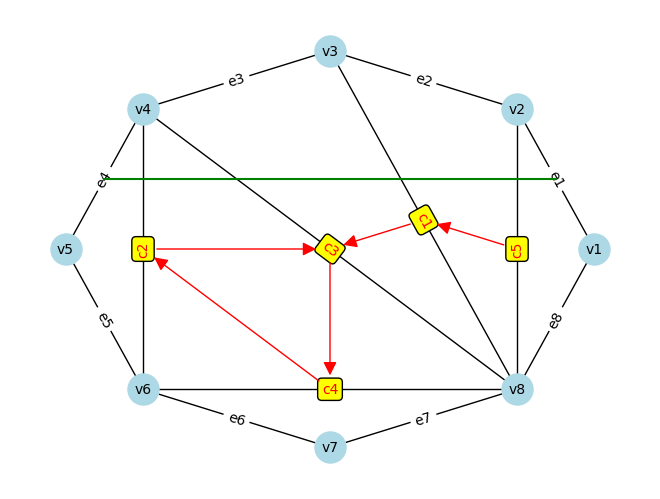

In [4]:
q.plot(
    # show_vertex_labels=False, 
    # show_frozen_labels=False
)

In [5]:
q.get_exchange_matrix()

,c1,c2,c3,c4,c5
c1,0,0,1,0,-1
c2,0,0,1,-1,0
c3,-1,-1,0,1,0
c4,0,1,-1,0,0
c5,1,0,0,0,0
Shear,0,0,-1,0,1


In [6]:
import pandas as pd

# 데이터 생성
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# 행과 열 이름 지정
row_names = ['Row1', 'Row2', 'Row3']
column_names = ['Col1', 'Col2', 'Col3']

# DataFrame 생성
df = pd.DataFrame(data, index=row_names, columns=column_names)

# DataFrame 출력
df


,Col1,Col2,Col3
Row1,1,2,3
Row2,4,5,6
Row3,7,8,9
